Clustering is a method in data mining and machine learning that groups similar data points together. The aim is to split a dataset into groups where data points within a group are more similar to each other than to those in other groups. Clustering is commonly used in tasks like image segmentation, market segmentation, and anomaly detection.

In Python, various libraries, including scikit-learn, pandas, and numpy, enable clustering. To use clustering in Python, you typically start by importing the necessary libraries, loading your dataset, and then defining the clustering algorithm you want to use.

For instance, to apply the K-Means algorithm in scikit-learn, you first import the KMeans class and then create an instance by specifying the desired number of clusters. Once you have your clustering algorithm instance, you can fit it to your data using the fit method.

To assess the performance of your clustering algorithm, you can utilize evaluation metrics such as silhouette score, Davies-Bouldin index, and Calinski-Harabasz index. Additionally, dimensionality reduction techniques like PCA or t-SNE can help visualize clusters in high-dimensional data.

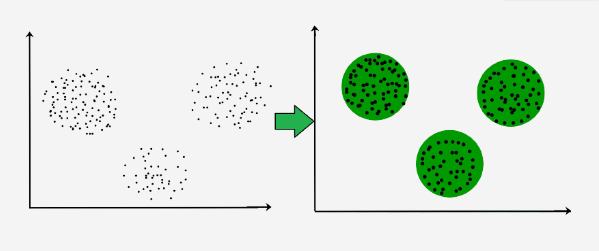

It's important to note that clustering is an unsupervised method, meaning that it doesn't require labeled data to work and the output is not clear as classification, it's a way to explore the data and try to find patterns, so the interpretation of the results is an important step.

# Import Necessary Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization


In [2]:
df = pd.read_csv('/content/Live.txt')

In [3]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


https://www.kaggle.com/datasets/mehmetisik/livecsv?select=Live.csv

# Preliminary Analysis

Preliminary analysis involves initial exploration and understanding of data to identify patterns, trends, or anomalies. It serves as a foundation for more in-depth analysis and decision-making in various domains such as business, research, and data science.

In [4]:
print(df.shape)

df.isnull().sum()

(7050, 16)


,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


# Data Preparation

Data preparation involves the process of transforming raw data into a format suitable for analysis or modeling. This includes tasks such as cleaning, handling missing values, encoding categorical variables, scaling, normalization, and feature engineering. The goal is to ensure that the data is accurate, complete, and structured in a way that facilitates effective analysis and modeling.

In [5]:
df.drop(["status_id", "status_published", "Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


A feature vector is a set of numerical features that represent an object or sample. In machine learning, a feature vector is used as input to a model, and it typically contains multiple features that describe the characteristics of the object.

A target variable, also known as a response or dependent variable, is the variable that the model is trying to predict. It is the output of the model, and it is typically a numerical or categorical value.

For example, in a supervised learning problem where we want to predict the price of a house, the feature vector might include things like the number of bedrooms, square footage, and neighborhood, while the target variable would be the price of the house.

# Convert Categorical Variable into Integers

In [6]:
X = df.copy()

In [7]:
y = df["status_type"]

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X["status_type"] = le.fit_transform(X["status_type"])

y = le.transform(y)

# Feature Scaling

Feature scaling is a technique used to standardize the range of independent variables or features of data. In machine learning, it is a step of data pre-processing that aims to normalize the data dimensions so that they are on a similar scale. This is important because many machine learning algorithms use some form of distance measure, such as Euclidean distance, to compare observations. If the scale of the data is not consistent, certain features will have a much larger influence on the distance measure than others, which can lead to poor performance in some machine learning algorithms.

There are different ways to perform feature scalings, such as normalization, standardization, and Min-Max scaling.

Min-Max scaling scales the data to a given range, usually between 0 and 1;

Standardization scales the data so that it has a mean of 0 and a standard deviation of 1;

Normalization scales the data so that it has a minimum value of 0 and a maximum value of 1.

It's important to note that the feature scaling should be done only on the independent variable(s) and not on the dependent variable.

In [9]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

In [10]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means Model with 2 Clusters

K-means clustering is a method of unsupervised machine learning that groups similar data points together in clusters. The algorithm starts by randomly selecting K initial centroids, where K is the number of clusters desired. Data points are then assigned to the cluster whose centroid is closest to them. The centroids are then recomputed based on the mean of all the data points in the cluster, and the process is repeated until the centroids no longer change. The result is a set of K clusters, with each data point belonging to one cluster. It is widely used for image compression, image segmentation and other applications.

**Methods description**

*sklearn.cluster*: This module from scikit-learn provides a variety of clustering algorithms and utilities for clustering tasks;

*KMeans*: A class representing the K-Means clustering algorithm. It partitions data into K clusters based on centroids and minimizes the within-cluster variance;

*n_clusters*: Parameter specifying the number of clusters to form;
random_state: Parameter controlling the random number generation for centroid initialization;

*.fit*(): Method to fit the KMeans model to the data X, where X is a feature array or sparse matrix.

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

Now that we have trained our clustering algorithm we have to evaluate its performances to assess the results.

**Methods description**

*.labels_*: This attribute of the KMeans object contains the cluster labels assigned to each data point after fitting the KMeans algorithm to the data;

*y == labels:* This is a comparison operation that checks element-wise equality between two arrays y and labels, resulting in a boolean array;

*correct_labels:* This variable stores the count of data points that were correctly labeled, i.e., assigned to the correct cluster.

In [12]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


# How many Clusters?

You may be wondering: But hey, what is the exact number of clusters? We can use the so-called "elbow method".

The elbow method is a technique used to determine the optimal number of clusters in a k-means clustering algorithm. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The "elbow" is the point of inflection on the curve where the explained variation begins to decrease at a slower rate. This point is considered the optimal number of clusters because adding more clusters will not significantly improve the explained variation.

**Methods description**

*range(start, end)*: This generates a sequence of numbers from start (inclusive) to end (exclusive), representing the range of possible cluster numbers to be tested;

*kmeans.inertia_*: This attribute of the KMeans object retrieves the inertia value calculated for the current clustering configuration;

*cs:* This is an empty list that will store the "inertia" values calculated for each number of clusters. Inertia represents the sum of squared distances of samples to their closest cluster center;

*plt.plot():* This function from the matplotlib library (matplotlib.pyplot) is used to create a line plot. It plots the number of clusters on the x-axis against the corresponding inertia values (CS) on the y-axis;

*plt.title(), plt.xlabel(), plt.ylabel()*: These functions set the title, x-axis label, and y-axis label of the plot, respectively;

*plt.show()*: This function displays the plot.

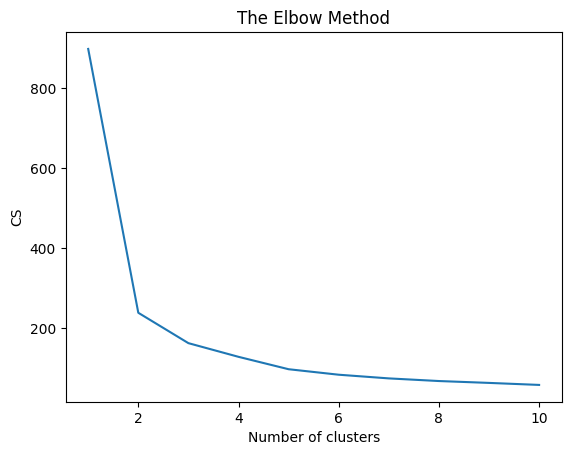

In [13]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

Let's try to improve clustering results using the split on 4 separate clusters.

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Accuracy score: {0:0.2f}". format(correct_labels/float(y.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 4347 out of 7050 samples were correctly labeled.
Accuracy score: 0.62
